## Librerias

In [1]:
from PIL import Image #Libreria PILLOW
import numpy as np    #Libreria NUMPY
import matplotlib.pyplot as plt #Librería Matplotlib
%matplotlib inline

## Funciones

In [2]:
def im_to_YIQ(im):
    im_norm= im/256
    mat_a_YIQ= np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
    im_yiq= np.dot(im_norm, mat_a_YIQ.T)
    return im_yiq

def yiq_coef(im, alpha, beta):
    coe= [alpha,beta,beta]
    im_yiq_coef= im*coe
    #Clampeo Y
    im_yiq_coef[:,:,0][im_yiq_coef[:,:,0]>1] = 1
    #Clampeo I
    im_yiq_coef[:,:,1][im_yiq_coef[:,:,1]>0.5957] = 0.5957
    im_yiq_coef[:,:,1][im_yiq_coef[:,:,1]<(-0.5957)] = (-0.5957)
    #Clampeo Q
    im_yiq_coef[:,:,2][im_yiq_coef[:,:,2]>0.5226] = 0.5226
    im_yiq_coef[:,:,2][im_yiq_coef[:,:,2]<(-0.5226)] =( -0.5226)
    
    return im_yiq_coef


def im_to_RGB(im):
    mat_a_RGB= np.array([[1,0.9663,0.6210],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])
    im_RGB= np.dot(im, mat_a_RGB.T)
    im_RGB*= 255
    #Clampeo RGB
    im_RGB[im_RGB>255]= 255
    im_RGB[im_RGB<0]= 0
    return im_RGB.astype(np.uint8)
 
def show_two_im(a, b, text):
    im1= Image.fromarray(a)
    im2= Image.fromarray(b)
    plt.subplot(121), plt.imshow(im1)
    plt.title("Original")

    plt.subplot(122), plt.imshow(im2)
    plt.title(text)

def sum_rgb_clamp(a1, a2):
    sum_rgb_clamp= np.zeros(a1.shape, dtype="int16")
    sum_rgb_clamp+=a1
    sum_rgb_clamp+=a2
    sum_rgb_clamp[sum_rgb_clamp>255]=255
    return sum_rgb_clamp.astype(np.uint8)

def sum_rgb_prom(a1,a2):
    sum_rgb_prom= a1*0.5 +a2*0.5
    return sum_rgb_prom.astype(np.uint8)

def sum_yiq_clamp(a1_yiq, a2_yiq):
    sum_yiq_clam= np.zeros(a1_yiq.shape)
    sum_yiq_clam[:,:,0]= a1_yiq[:,:,0] +a2_yiq[:,:,0]
    sum_yiq_clam[sum_yiq_clam[:,:,0]>1]=1
    sum_yiq_clam[:,:,1]= (a1_yiq[:,:,0]*a1_yiq[:,:,1] +a2_yiq[:,:,0]*a2_yiq[:,:,1])/(a1_yiq[:,:,0] +a2_yiq[:,:,0])
    sum_yiq_clam[:,:,2]= (a1_yiq[:,:,0]*a1_yiq[:,:,2] +a2_yiq[:,:,0]*a2_yiq[:,:,2])/(a1_yiq[:,:,0] +a2_yiq[:,:,0])

    return sum_yiq_clam.astype(np.uint8)

#Función Lineal a trozos
def lineal_tramos(x_min, x_max):
    x2= np.arange(0,1, 0.01)
    y2= np.arange(0,1, 0.01)
    y2_= np.arange(0,1, 0.01)

    for x in range(y2.shape[0]):
        if x2[x]>=x_max:
            y2_[x]=1 
        if x2[x]<=x_min:
            y2_[x]=0 
        if x2[x]>x_min and x2[x]<x_max:
            y2_[x]=y2[x]/(x_max-x_min)-x_min/(x_max-x_min)         
    plt.plot(x2,y2_, "-")
    plt.grid()
    plt.xlabel("Luminancia de entrada")
    plt.ylabel("Luminancia de salida")
    plt.title("Correción de luminancia con función lineal a trozos")
    
#Función Histograma de luminancia
def hist_lumin(im_a):
    im_a_yiq= im_to_YIQ(im_a)
    y_im_a= im_a_yiq[:,:,0]
    ax= plt.hist(y_im_a.reshape(y_im_a.size), 10, weights=np.zeros_like(y_im_a.reshape(y_im_a.size)) + 1. /y_im_a.size)
    plt.title("Histograma de Luminancia")
    plt.xlabel("Luminancia")
    plt.ylabel("Frec. Rel. de aparición (%)")
    plt.show
def im_con_his(im_a):
    im_a_yiq= im_to_YIQ(im_a)
    y_im_a= im_a_yiq[:,:,0]
    
    fig, (ax, ax2) = plt.subplots(1, 2, figsize=(6,6))

    ax.set_aspect('auto')
    ax.set_title('Imagen', fontsize=15)

    ax.imshow(im_a)

    ax2.set_aspect('equal')
    ax2.set_title('Histograma', fontsize=15)

    ax2.hist(y_im_a.reshape(y_im_a.size), 10, weights=np.zeros_like(y_im_a.reshape(y_im_a.size)) + 1. /y_im_a.size)
    ax2.grid()

    plt.show()

## Ejercicios
Abrir una imagen y mostrar su histograma de luminancia

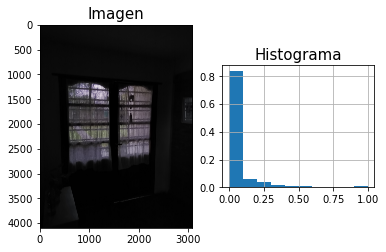

In [4]:
im= Image.open("oscura_casa.jpg")
im_con_his(np.asarray(im))

## Corrección de luminancia a traves de factor alpha

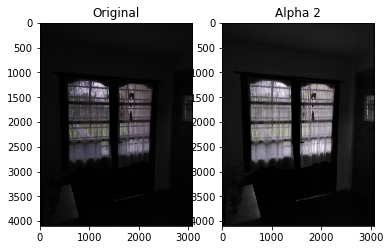

In [14]:
im_yiq= im_to_YIQ(np.asarray(im))
im_coe= yiq_coef(im_yiq,2, 1) #Multiplico Y por 2
im4= im_to_RGB(im_coe)
show_two_im(np.asarray(im), im4, "Alpha 2")

## Histograma con corrección de alpha

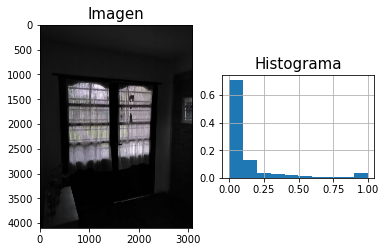

In [9]:
im_con_his(np.asarray(im4))

## Función Raiz Cuadrada

Text(0.5, 1.0, 'Correción de Luminancia con función Raíz Cuadrada')

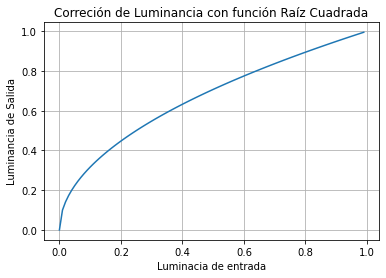

In [10]:
x= np.arange(0,1,0.01)
y= np.sqrt(x)
plt.plot(x,y, "-")
plt.grid()
plt.ylabel("Luminancia de Salida")
plt.xlabel("Luminacia de entrada")
plt.title("Correción de Luminancia con función Raíz Cuadrada")

## Corrección de Luminacia con Raiz cuadrada

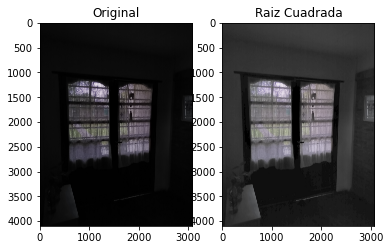

In [16]:
im_yiq= im_to_YIQ(np.asarray(im))
Y= im_yiq[:,:,0]
Ysqrt= np.sqrt(Y)
im_yiq[:,:,0]= Ysqrt
im_rgb= im_to_RGB(im_yiq)
show_two_im(np.asarray(im), im_rgb, "Raiz Cuadrada")

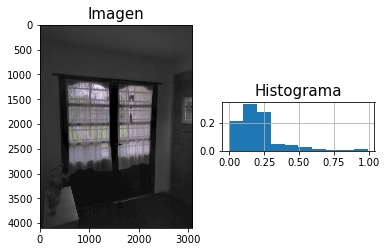

In [17]:
im_con_his(np.asarray(im_rgb))

## Función cuadrática

Text(0.5, 1.0, 'Correción de luminancia con función cuadrática')

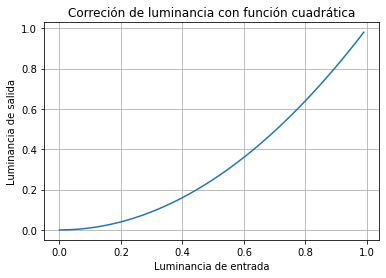

In [18]:
x1= np.arange(0,1, 0.01)
y1= np.square(x1)
plt.plot(x1,y1, "-")
plt.grid()
plt.xlabel("Luminancia de entrada")
plt.ylabel("Luminancia de salida")
plt.title("Correción de luminancia con función cuadrática")

## Corrección de Luminacia con Función Cuadratica

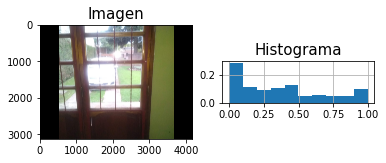

In [19]:
im_cc= Image.open("auto.jpg").rotate(270)
im_con_his(np.asarray(im_cc))

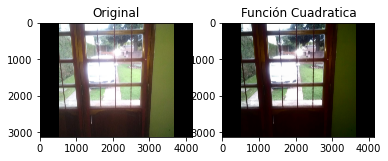

In [22]:
im_cc_yiq= im_to_YIQ(np.asarray(im_cc))
Y_c= im_cc_yiq[:,:,0]
Y_cc= np.square(Y_c)
im_cc_yiq[:,:,0]= Y_cc
im_rgb_c= im_to_RGB(im_cc_yiq)
show_two_im(np.asarray(im_cc), im_rgb_c, "Función Cuadratica")

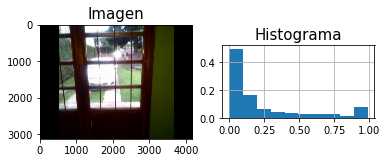

In [23]:
im_con_his(np.asarray(im_rgb_c))

## Función Lineal a trozos

$$Y>Y_{max} -> Y'=1 \\ Y<Y_{min} -> Y'=0 \\ Y_{min}<Y<Y_{max} -> Y'= \frac{Y}{Y_{max}-Y_{min}} - \frac{Y_{min}}{Y_{max}-Y_{min}}   $$

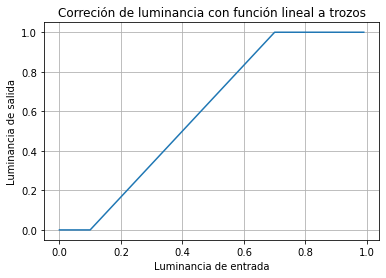

In [24]:
lineal_tramos(0.1,0.7) #Ymax e Ymin

## Corrección de Luminacia con Función Lineal a trozos

In [25]:
im_l= Image.open("auto.jpg").rotate(270)
a_l= np.asarray(im_l)

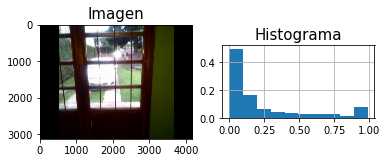

In [26]:
im_con_his(np.asarray(im_rgb_c))

In [27]:
#Aplico Función
Ymin= 0.1
Ymax= 0.9
yiq_l= im_to_YIQ(a_l)
Y_l= yiq_l[:,:,0]
Y_l[Y_l<Ymin]= Ymin
Y_l[Y_l>Ymax]= Ymax
for x in range(Y_l.shape[0]):
    for y in range(Y_l.shape[1]):
        if Y_l[x,y]>Ymin and Y_l[x,y]<Ymax:
            Y_l[x,y]= Y_l[x,y]/(Ymax-Ymin)-Ymin/(Ymax-Ymin)  
yiq_l[:,:,0]= Y_l
rgb_l= im_to_RGB(yiq_l)

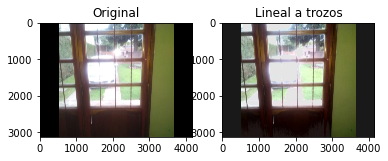

In [28]:
show_two_im(a_l, rgb_l, "Lineal a trozos")

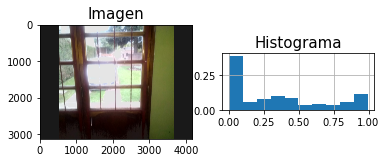

In [29]:
im_con_his(np.asarray(rgb_l))

## Definición de funciones

In [30]:
def func_sqrt(im):
    im_yiq= im_to_YIQ(im)
    Y= im_yiq[:,:,0]
    Y_sq= np.sqrt(Y)
    im_yiq[:,:,0]= Y_sq
    im_rgb= im_to_RGB(im_yiq)
    return im_rgb

def func_sqr(im):
    im_yiq= im_to_YIQ(im)
    Y= im_yiq[:,:,0]
    Y_sq= np.square(Y)
    im_yiq[:,:,0]= Y_sq
    im_rgb= im_to_RGB(im_yiq)
    return im_rgb

def func_lin_a_trozos(im, Ymin, Ymax):
    yiq= im_to_YIQ(im)
    Y= yiq[:,:,0]
    Y[Y<Ymin]= Ymin
    Y[Y>Ymax]= Ymax
    for x in range(Y.shape[0]):
        for y in range(Y.shape[1]):
            if Y[x,y]>Ymin and Y[x,y]<Ymax:
                Y[x,y]= Y[x,y]/(Ymax-Ymin)-Ymin/(Ymax-Ymin)  
    yiq[:,:,0]= Y
    rgb= im_to_RGB(yiq)
    return rgb

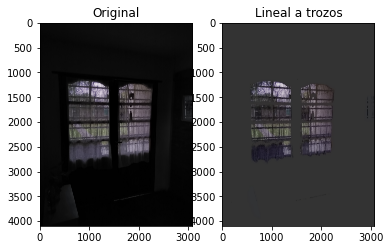

In [39]:
im_l= Image.open("oscura_casa.jpg")
a_l= np.asarray(im_l)
a_prueba= func_lin_a_trozos(a_l, 0.2,1)
show_two_im(a_l, a_prueba, "Lineal a trozos")

# FIN